In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# inputs = Input((784,))
# hidden_1 = Dense(3, activation = 'relu')(inputs)
# hidden_2 = Dense(3, activation= 'sigmoid')(hidden_1)
# outputs = Dense(1, activation = 'softmax')(hidden_2)
# model = Model(inputs, outputs)
# model.summary(show_trainable= True)

In [2]:
inputs = Input(shape=(1,), name="input_layer")
h1 = Dense(64, activation='relu', name="hidden_layer_1")(inputs)
h2 = Dense(128, activation='relu', name="hidden_layer_2")(h1)
h3 = Dense(64, activation='relu', name="hidden_layer_3")(h2)
h4 = Dense(128, activation='relu', name='hidden_layer_4')(h3)
outputs = Dense(1, name="output_layer")(h4)
model = Model(inputs=inputs, outputs=outputs, name="simple_model")
model.summary(show_trainable=True)

Model: "simple_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_1 (Dense)      │ (None, 64)            │        128 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_2 (Dense)      │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_3 (Dense)      │ (None, 64)            │      8,256 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_4 (Dense)      │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ output_layer (Dense)        │ (None, 1)             │        129 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 25,153 (98.25 KB)

 Trainable params: 25,153 (98.25 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
import numpy as np
def square(x):
    return 5*(x**2) +(10*x) -2
# # Data Process
# n = 10000
# y = []
# x = np.random.randint(0, n , n)
# for i in range(n):
#     y.append(square(x[i]))
# y = np.array(y)
# print(x)
# print(y)

# n = np.linspace(-1000, 10000, 100000)
# n = np.random.permutation(n)
# x = n.reshape(-1, 1)
# y = square(n).reshape(-1, 1)


x = np.linspace(-200, 200 , 10000)
x = np.random.permutation(x)

y = square(x)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
print(len(x))
print(len(y))



10000
10000


In [4]:
# Prepare Trainning , Validation , Test Set
total_n = len(x)
train_n = int(total_n * 0.7)
val_n   = int(total_n * 0.1)
test_n  = int(total_n * 0.2)

trainX  = x[:train_n]
trainY  = y[:train_n]

valX    = x[train_n : train_n + val_n]
valY    = y[train_n : train_n + val_n]

testX   = x[train_n + val_n : train_n + val_n + test_n]
testY   = y[train_n + val_n : train_n + val_n + test_n]

In [5]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(trainX, trainY, validation_data= (valX, valY), epochs=200)


Epoch 1/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 5934860800.0000 - mae: 54370.2656 - val_loss: 515123488.0000 - val_mae: 20065.5391
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 494635136.0000 - mae: 19624.1582 - val_loss: 515069056.0000 - val_mae: 20280.9375
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 489137056.0000 - mae: 19531.1504 - val_loss: 494939040.0000 - val_mae: 19636.6602
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 471844512.0000 - mae: 19073.5195 - val_loss: 488162880.0000 - val_mae: 19786.0098
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 469256096.0000 - mae: 19025.7871 - val_loss: 475526368.0000 - val_mae: 19110.2051
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 466119552.0000 - mae: 18887.9297 - val_loss: 463401920.0000 - val_mae: 18881.9434
Epoch 7/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 454723968.0000 - mae: 18516.6406 - val_loss: 454539424.0000 - val_mae: 18978.69

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


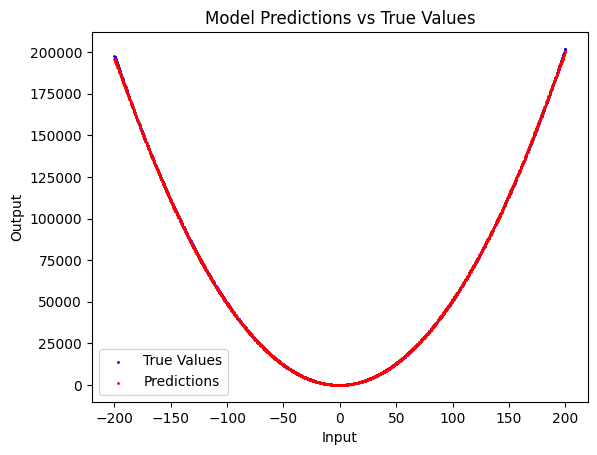

In [8]:
#testing the model
predictions = model.predict(testX)
import matplotlib.pyplot as plt
plt.scatter(testX, testY, label='True Values', color='blue', s=1)
plt.scatter(testX, predictions, label='Predictions', color='red', s=1)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Model Predictions vs True Values')
plt.legend()
plt.show()
# Save the model
model.save('PredictionModel.keras')

In [10]:
testV = 150
Expected = square(testV)

# Make testV a 2D array with shape (1, 1)
predicted = model.predict(np.array([[testV]]))

print(f"Expected: {Expected}, Predicted: {predicted[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Expected: 113998, Predicted: 114292.28125
